# COVID-19 mRNA Vaccine Degradation (EDA)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Data

### Load Data

In [3]:
train_data = pd.read_csv("C:\\Users\\96278\\Desktop\\covid_19\\train.csv")
test_data = pd.read_csv("C:\\Users\\96278\\Desktop\\covid_19\\test.csv")

### Data Overview



In [4]:
train_data.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,(,),S,S,C,A,.,),I,S
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,(,.,S,H,C,C,.,.,B,H
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,(,S,S,A,G,(,(,S,S
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,.,(,E,S,A,U,.,(,E,S
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,(,S,S,G,G,(,.,S,H


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130560 entries, 0 to 130559
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      130560 non-null  object 
 1   id_seqpos               130560 non-null  object 
 2   sequence                130560 non-null  object 
 3   structure               130560 non-null  object 
 4   predicted_loop_type     130560 non-null  object 
 5   reactivity              130560 non-null  float64
 6   reactivity_error        130560 non-null  float64
 7   deg_Mg_pH10             130560 non-null  float64
 8   deg_error_Mg_pH10       130560 non-null  float64
 9   deg_pH10                130560 non-null  float64
 10  deg_error_pH10          130560 non-null  float64
 11  deg_Mg_50C              130560 non-null  float64
 12  deg_error_Mg_50C        130560 non-null  float64
 13  deg_50C                 130560 non-null  float64
 14  deg_error_50C       

In [6]:
train_data.isnull().sum()

id                        0
id_seqpos                 0
sequence                  0
structure                 0
predicted_loop_type       0
reactivity                0
reactivity_error          0
deg_Mg_pH10               0
deg_error_Mg_pH10         0
deg_pH10                  0
deg_error_pH10            0
deg_Mg_50C                0
deg_error_Mg_50C          0
deg_50C                   0
deg_error_50C             0
b1_sequence               0
a1_sequence               0
b1_structure              0
a1_structure              0
b1_predicted_loop_type    0
a1_predicted_loop_type    0
b2_sequence               0
a2_sequence               0
b2_structure              0
a2_structure              0
b2_predicted_loop_type    0
a2_predicted_loop_type    0
b3_sequence               0
a3_sequence               0
b3_structure              0
a3_structure              0
b3_predicted_loop_type    0
a3_predicted_loop_type    0
b4_sequence               0
a4_sequence               0
b4_structure        

In [7]:
test_data.isnull().sum()

id                        0
id_seqpos                 0
sequence                  0
structure                 0
predicted_loop_type       0
reactivity_error          0
deg_error_Mg_pH10         0
deg_pH10                  0
deg_error_pH10            0
deg_error_Mg_50C          0
deg_50C                   0
deg_error_50C             0
b1_sequence               0
a1_sequence               0
b1_structure              0
a1_structure              0
b1_predicted_loop_type    0
a1_predicted_loop_type    0
b2_sequence               0
a2_sequence               0
b2_structure              0
a2_structure              0
b2_predicted_loop_type    0
a2_predicted_loop_type    0
b3_sequence               0
a3_sequence               0
b3_structure              0
a3_structure              0
b3_predicted_loop_type    0
a3_predicted_loop_type    0
b4_sequence               0
a4_sequence               0
b4_structure              0
a4_structure              0
b4_predicted_loop_type    0
a4_predicted_loop_ty

In [8]:
train_data.describe()

,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
count,130560.000000,130560.000000,130560.00000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000
mean,0.376570,2825.710861,0.44650,2332.806124,0.448538,6288.673592,0.405686,3579.976118,0.427428,5969.595514
std,0.730013,19105.915817,0.70582,14614.719469,1.300353,42323.269166,0.840844,23229.704416,1.126904,38182.352844
min,-20.664800,0.001900,-14.74050,0.006100,-44.515300,0.008300,-24.252500,0.004100,-38.339900,0.006500
25%,0.043800,0.044900,0.13130,0.057200,0.099900,0.073900,0.074100,0.052000,0.092700,0.081300
50%,0.216200,0.083000,0.28990,0.098800,0.276100,0.120500,0.256800,0.088800,0.308800,0.133700
75%,0.540400,0.172500,0.56760,0.200000,0.569100,0.244200,0.560000,0.181600,0.613825,0.265325
max,20.667500,146151.225000,14.74010,104235.174200,44.521200,314833.569500,24.252500,171525.321700,38.343800,271158.604000


In [9]:
train_data.drop('id', axis=1, inplace=True)
train_data.drop('id_seqpos', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)
test_data.drop('id_seqpos', axis=1, inplace=True)

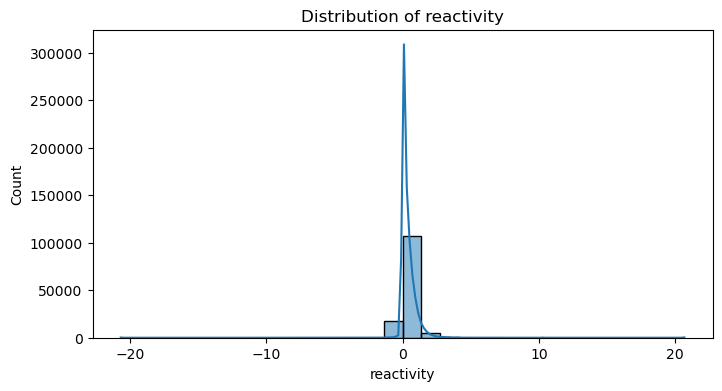

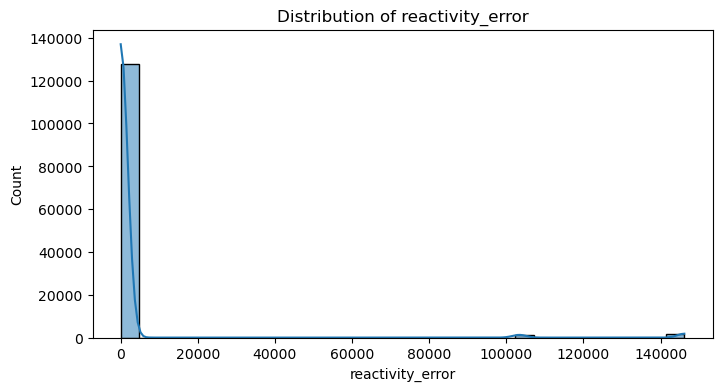

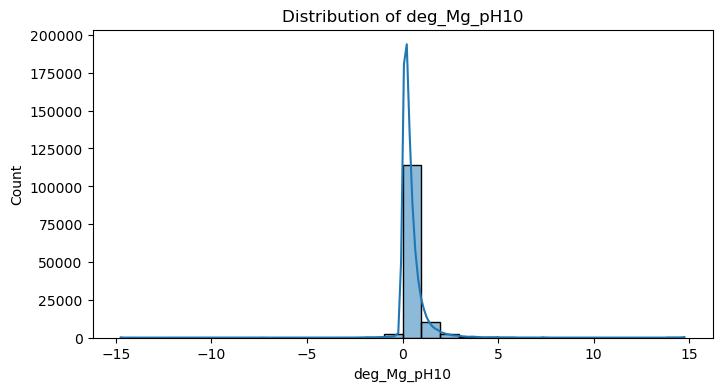

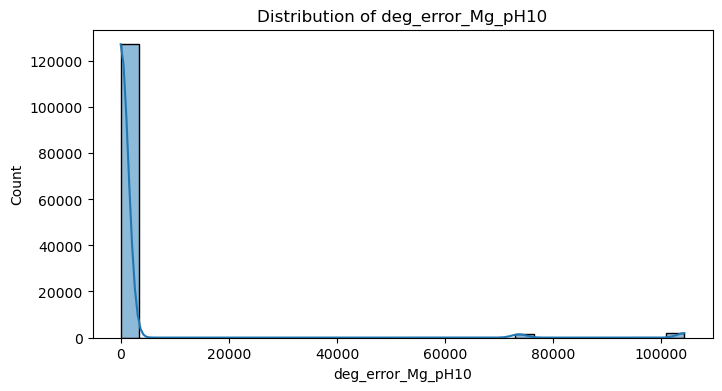

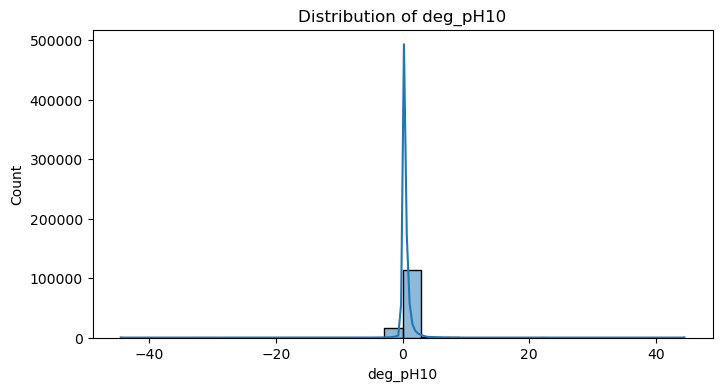

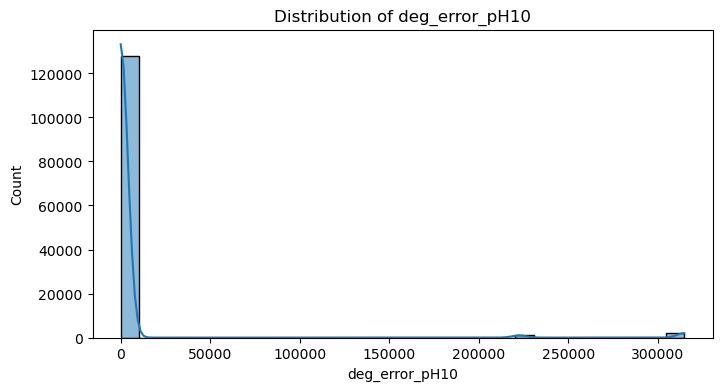

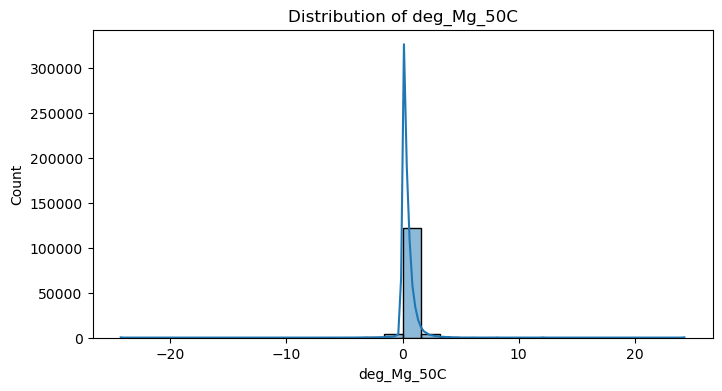

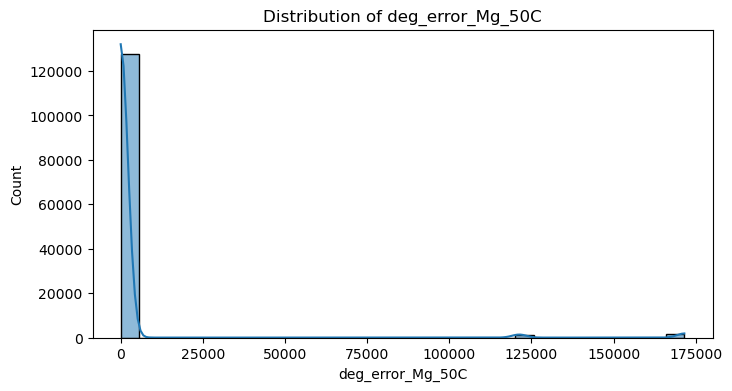

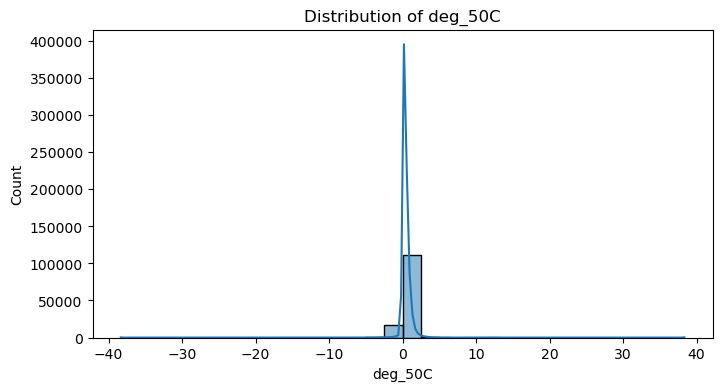

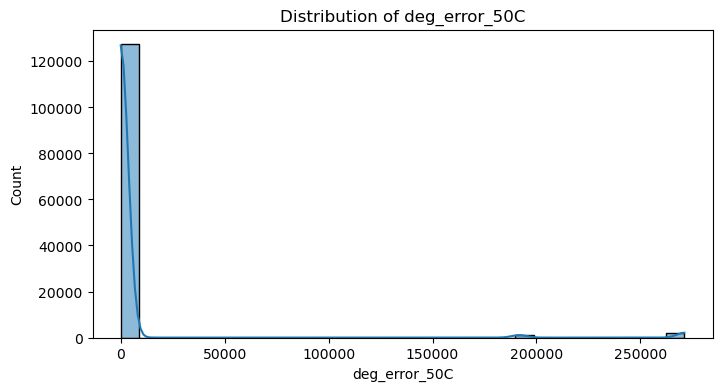

In [10]:
# Histograms for numerical features
num_cols = train_data.select_dtypes(include=['float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=train_data, x=col, bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.show()

### Categorical Features

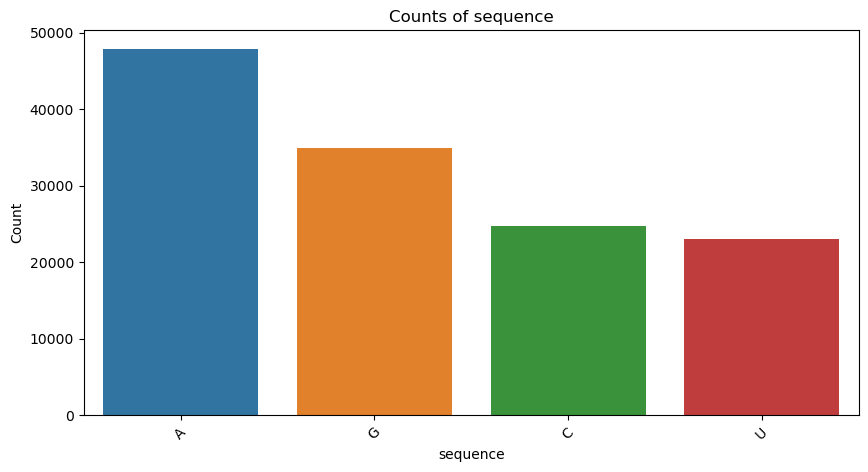

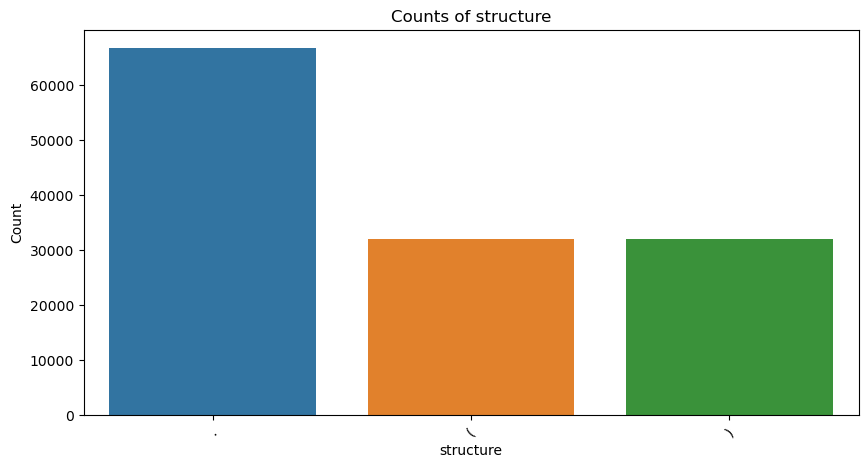

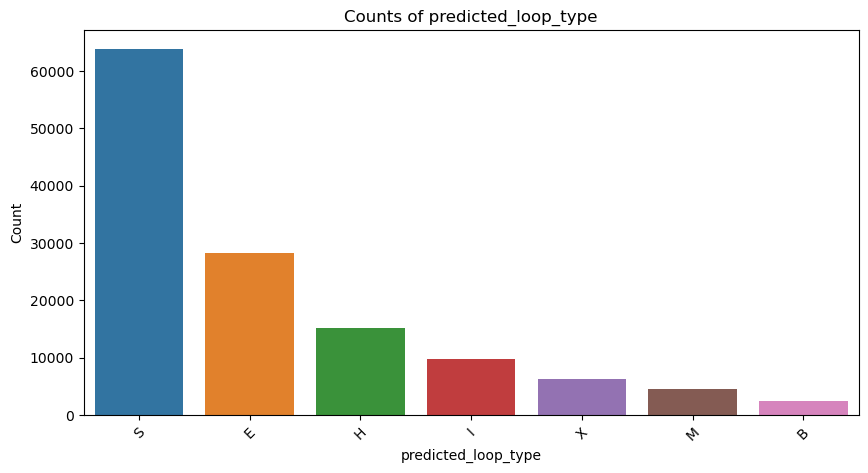

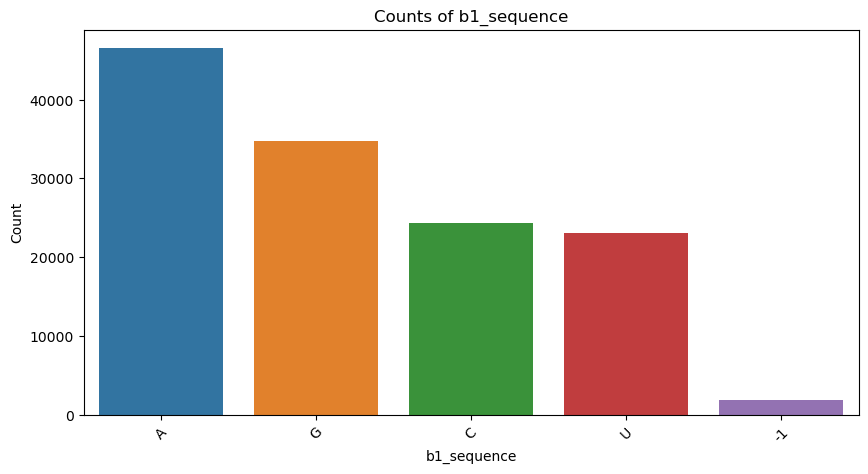

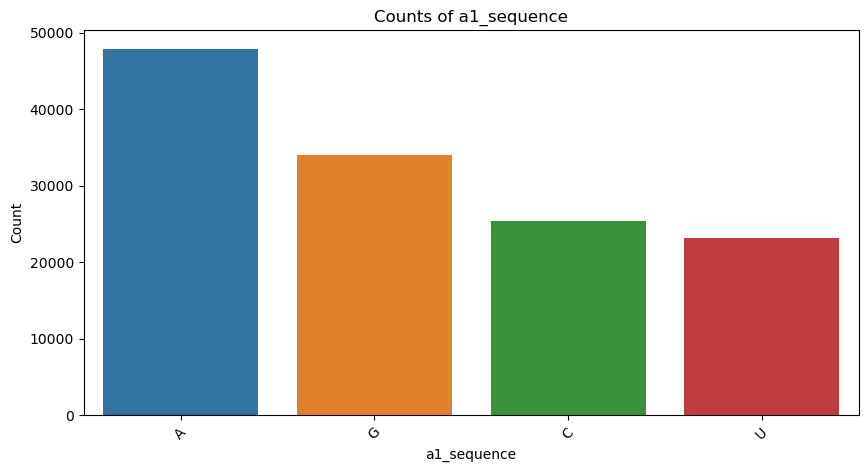

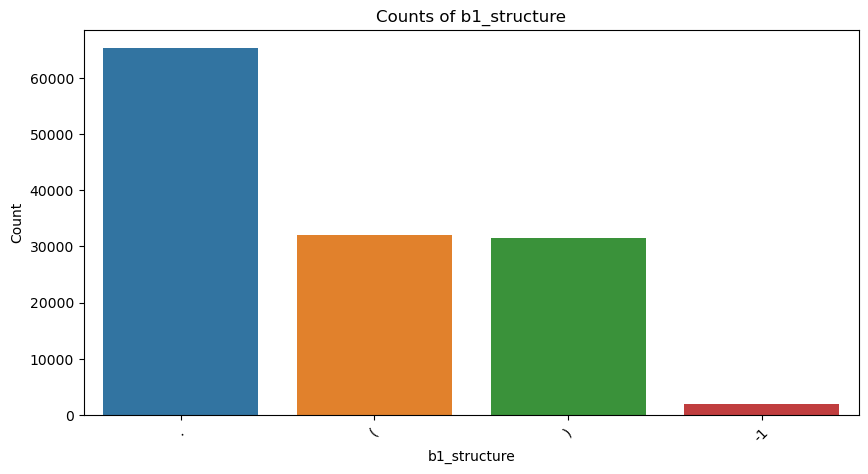

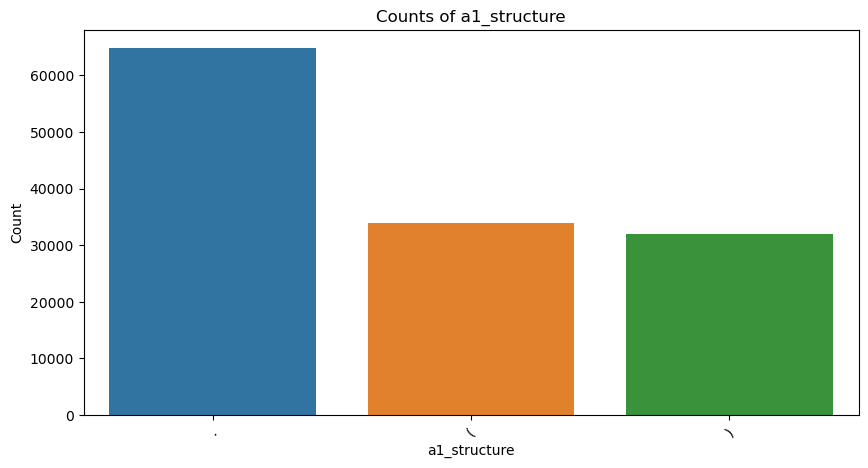

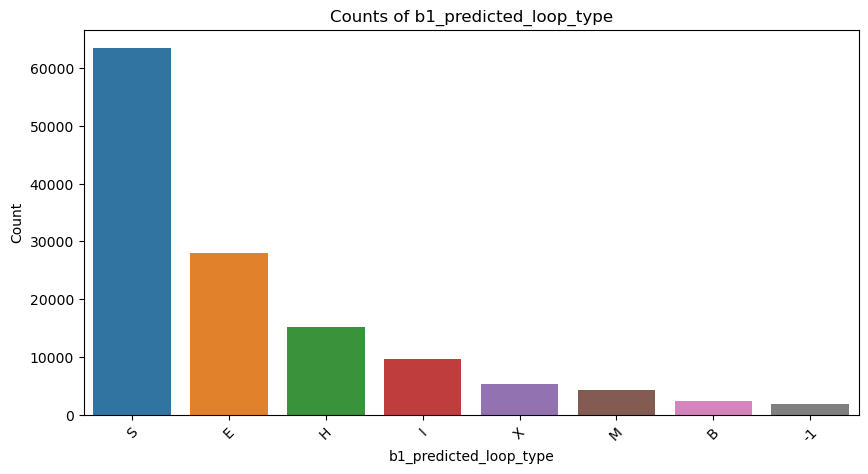

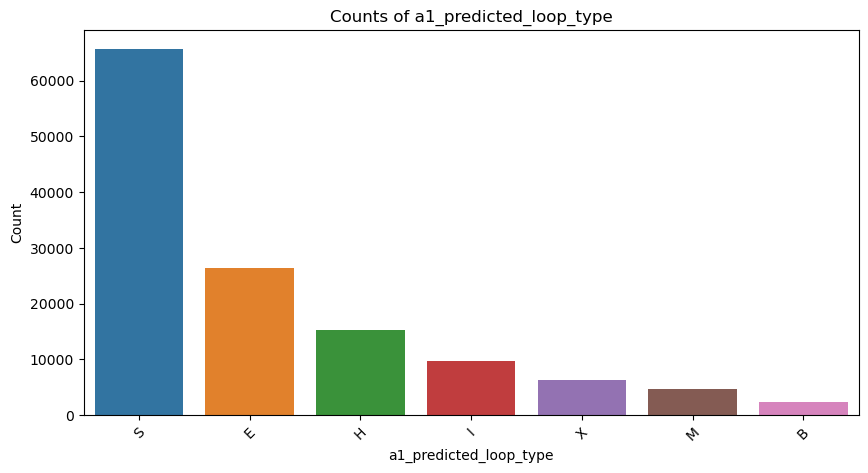

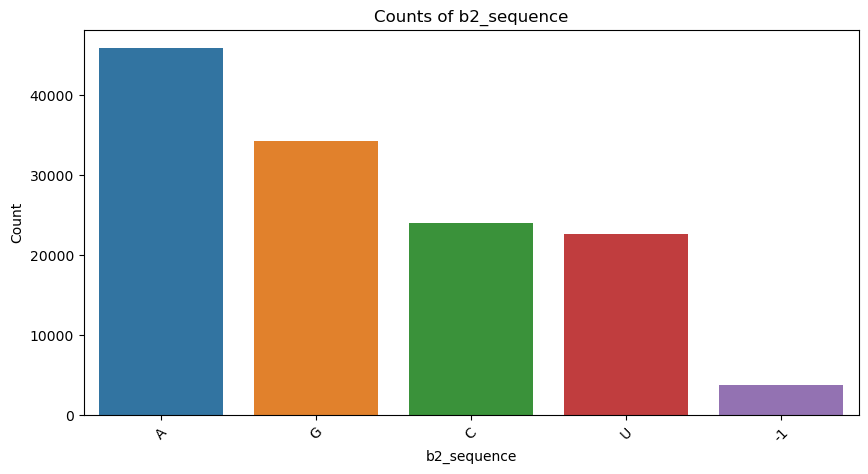

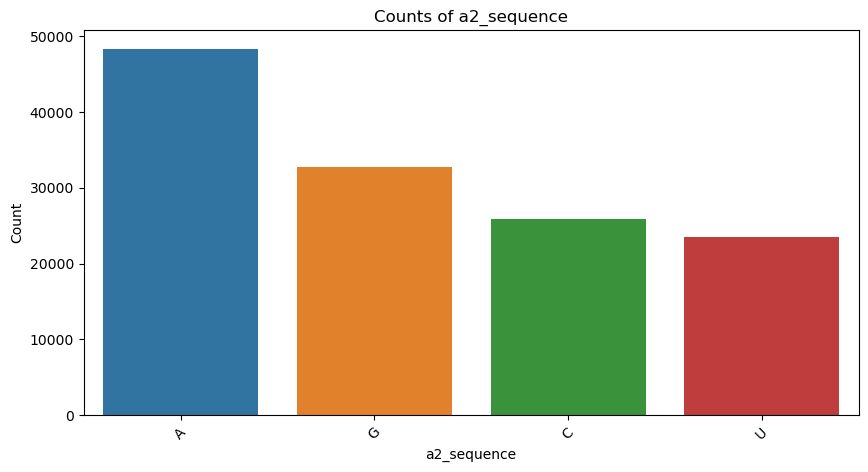

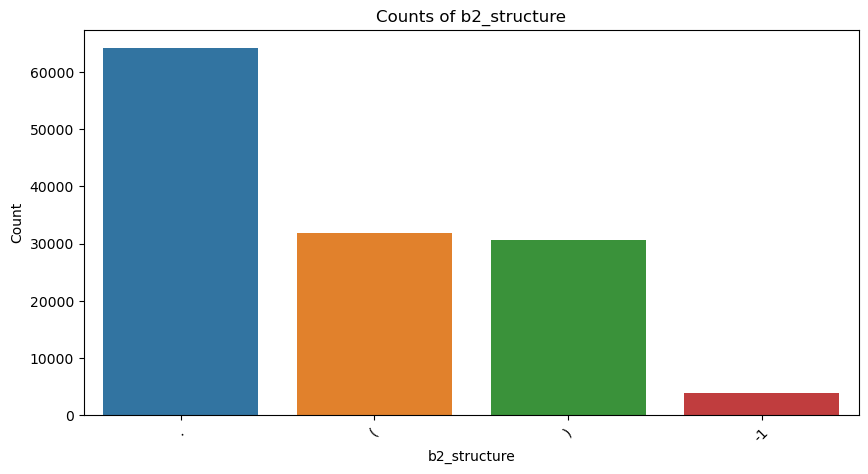

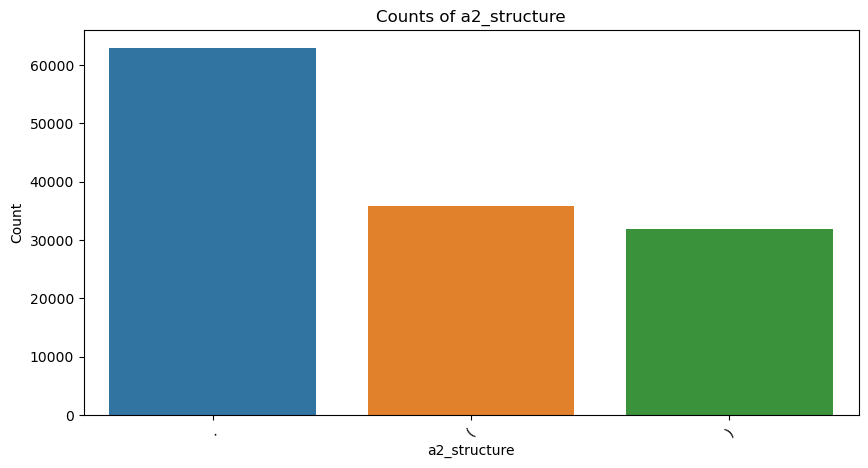

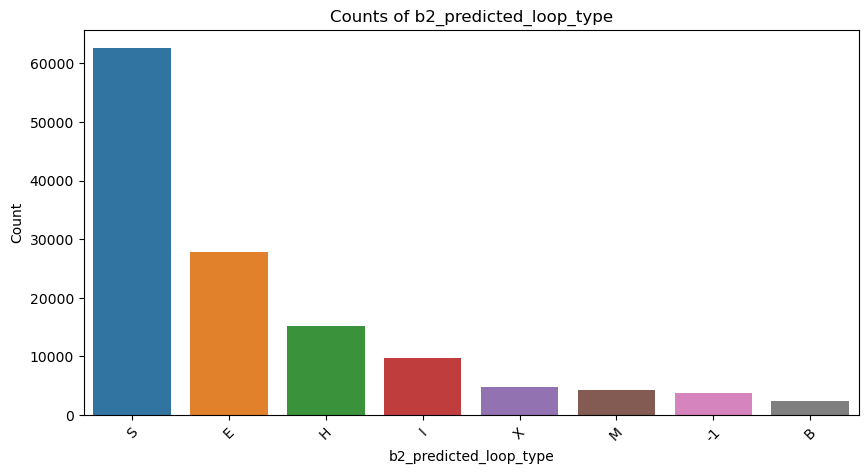

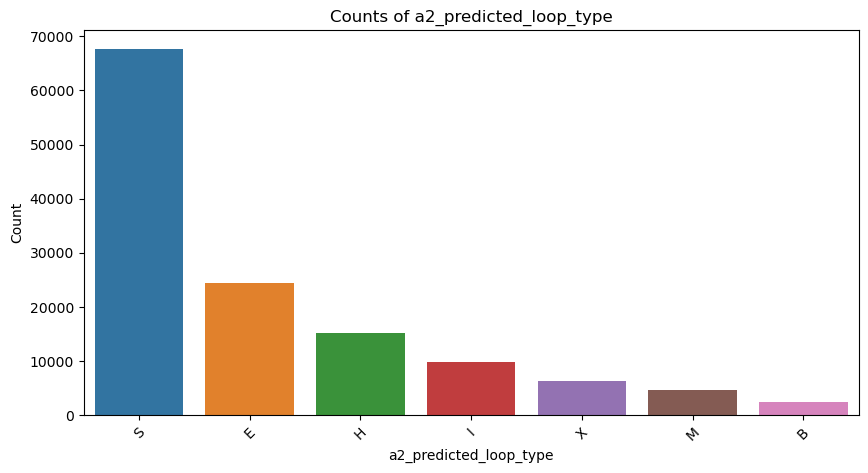

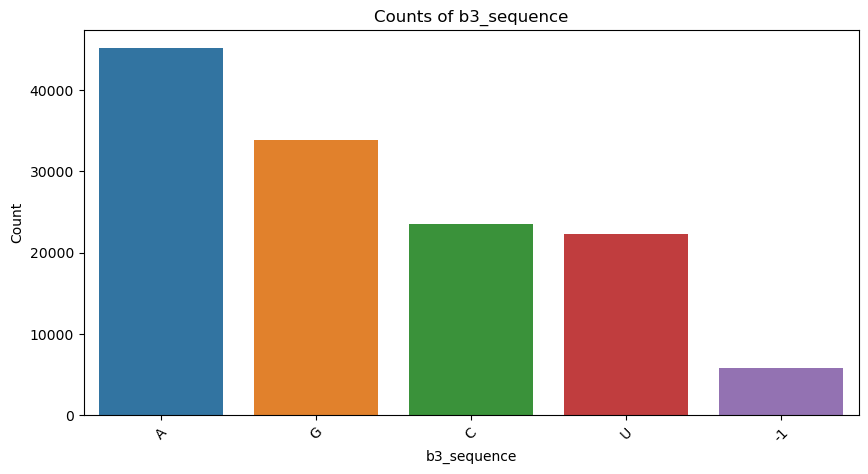

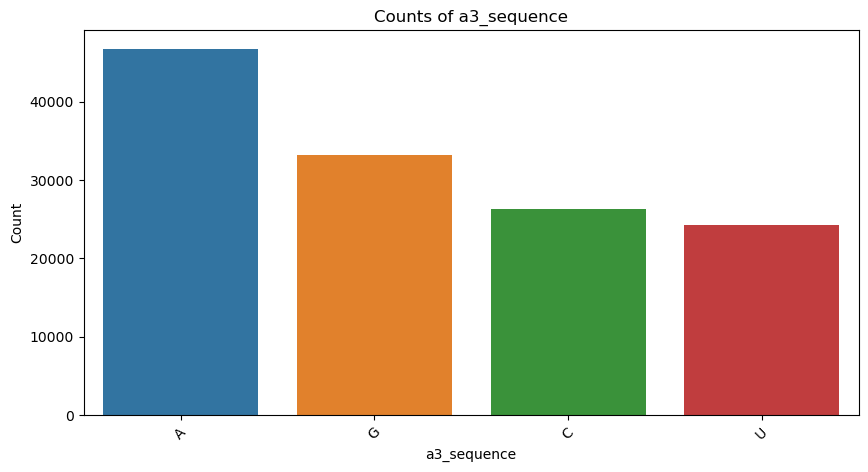

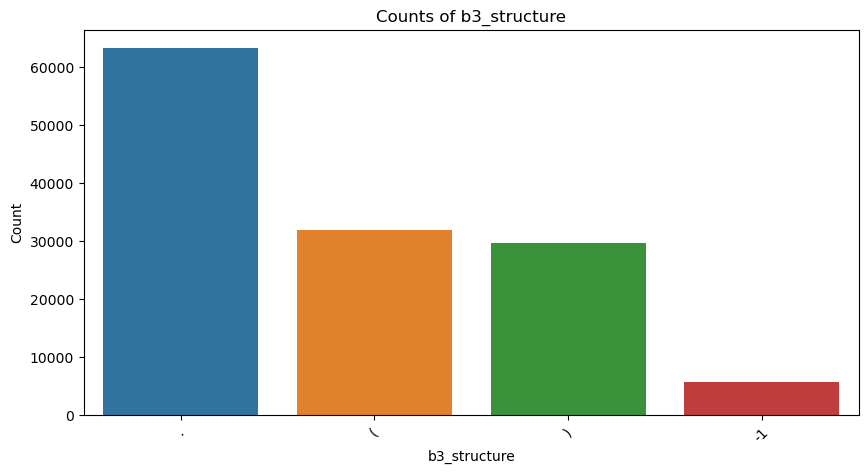

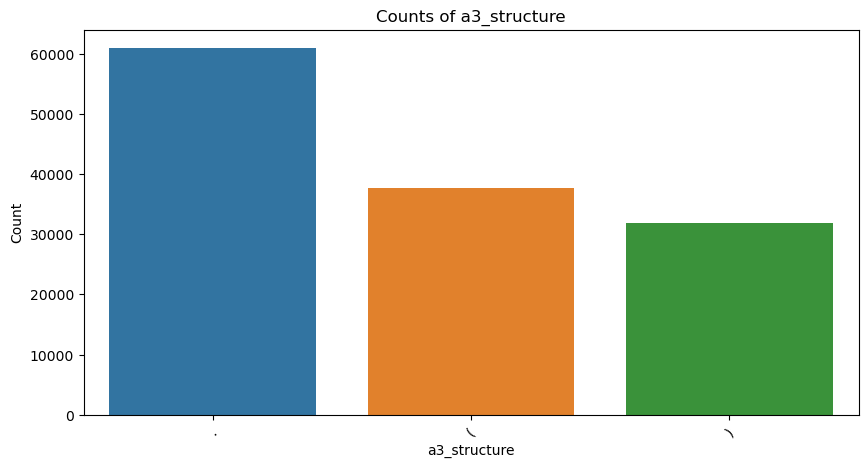

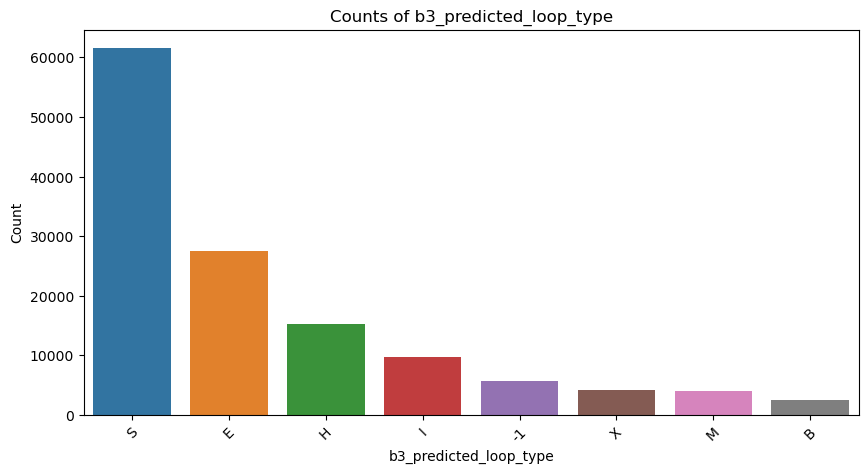

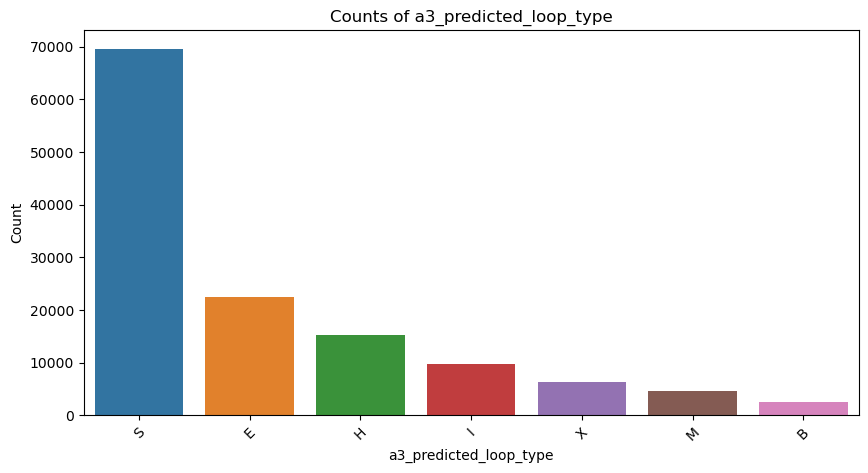

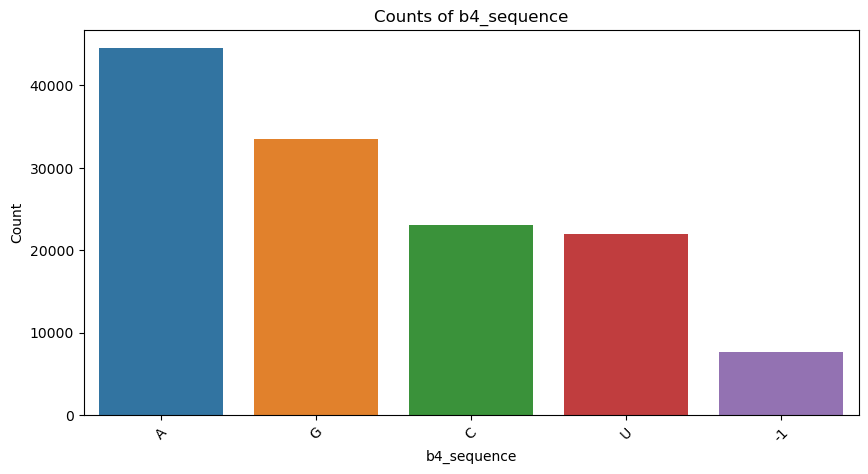

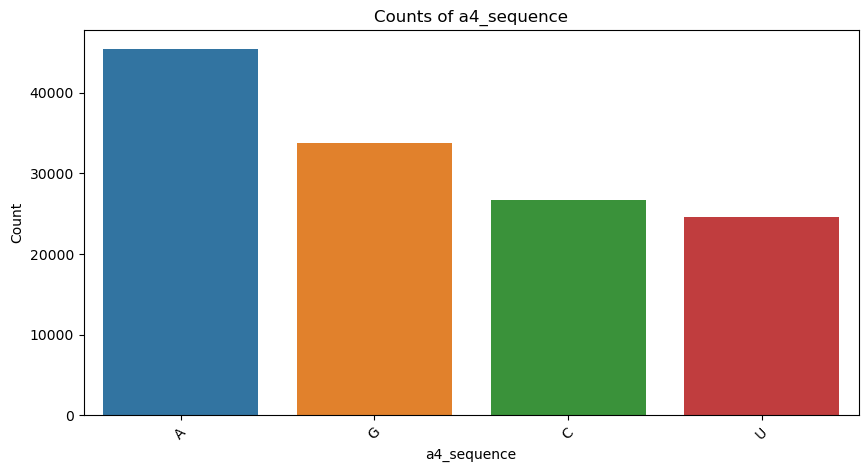

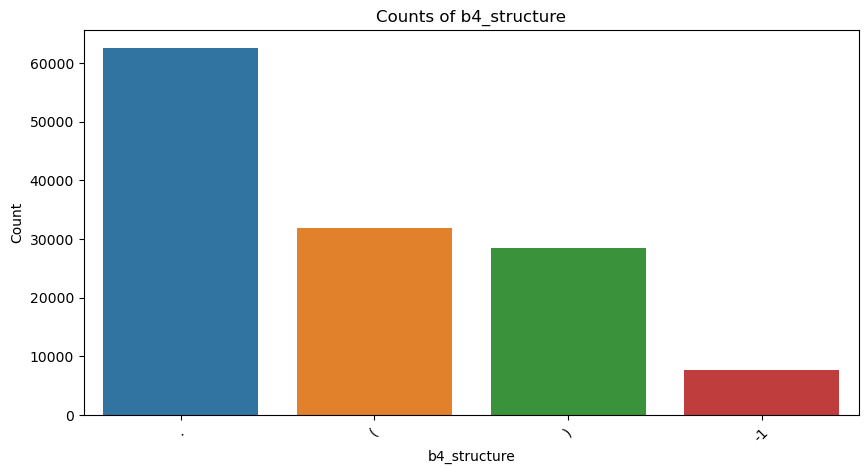

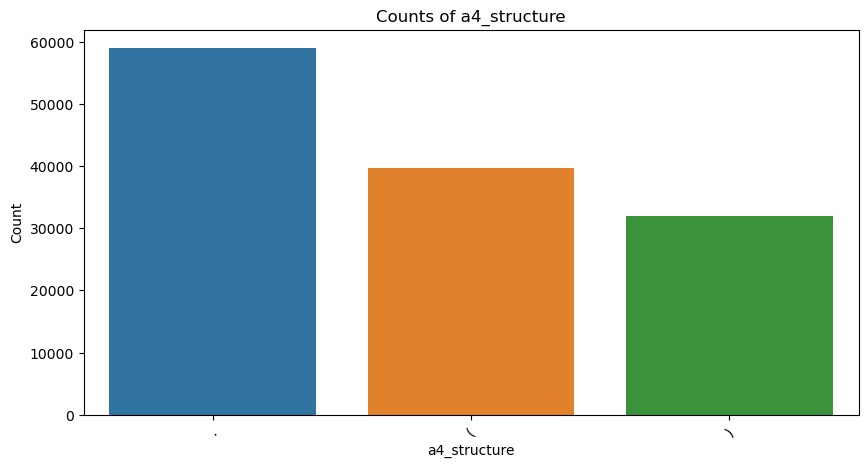

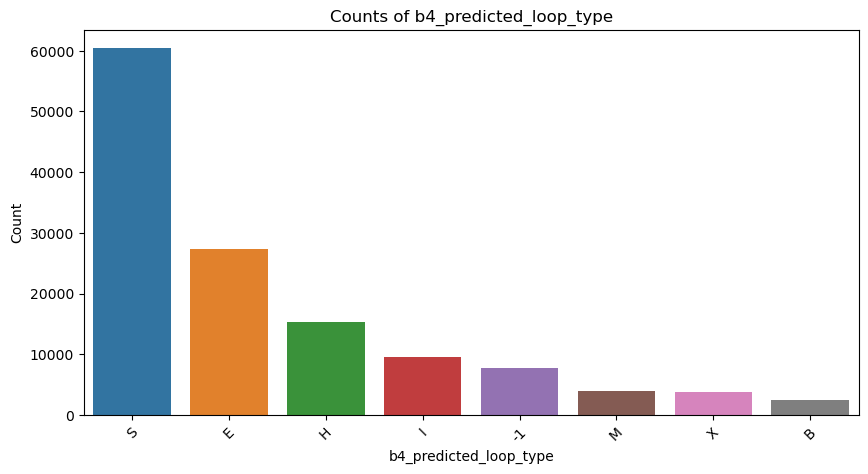

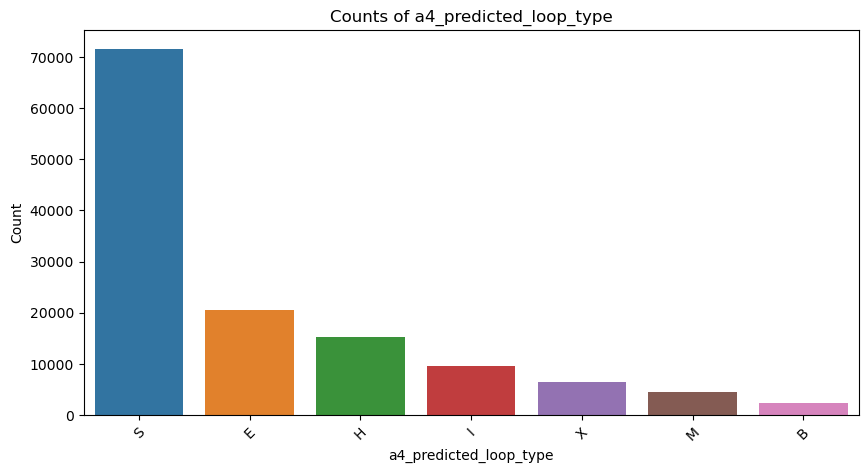

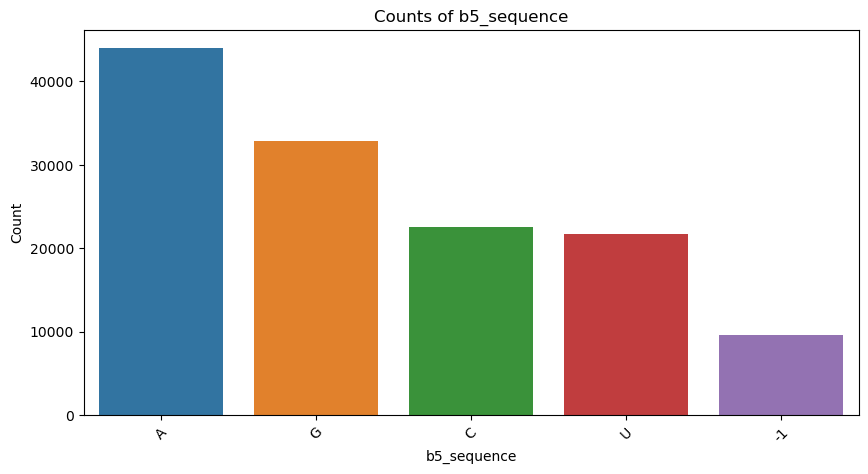

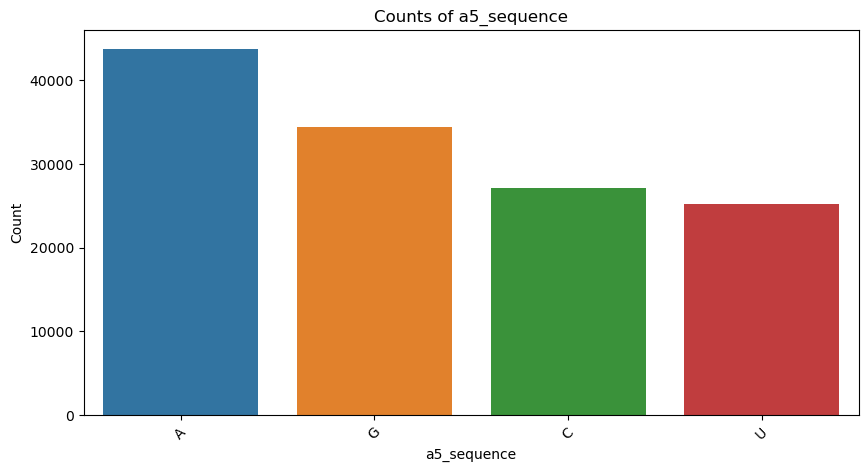

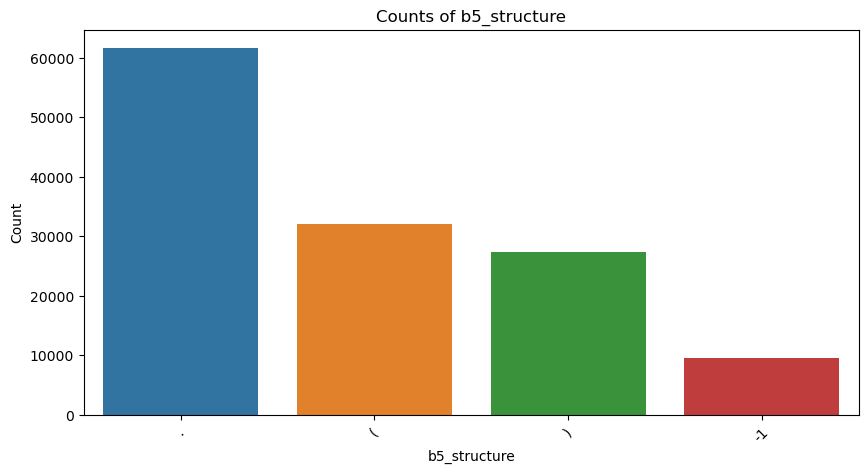

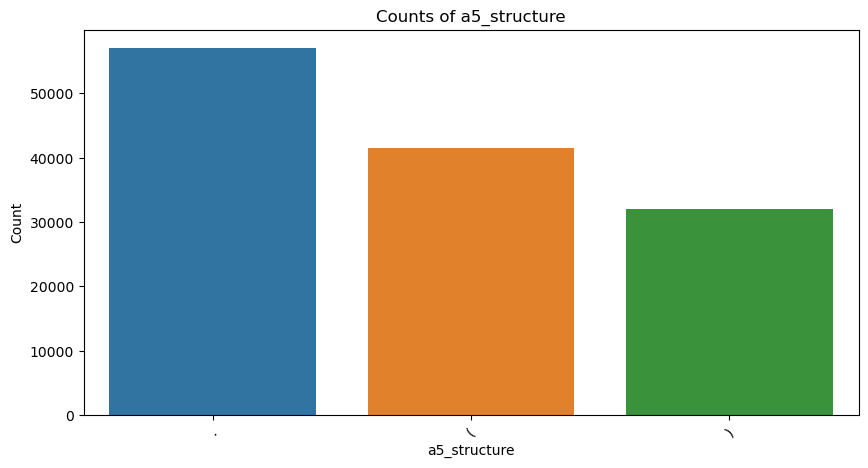

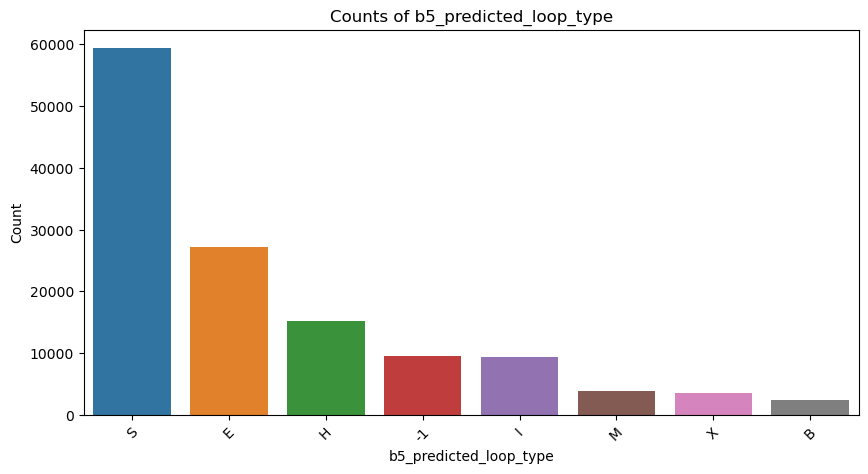

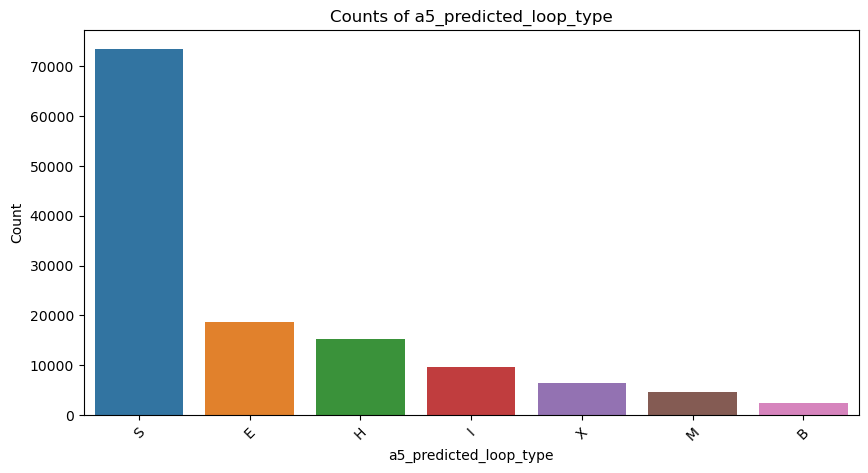

In [11]:
# Explore categorical columns
cat_cols = train_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Counts of {col}')
    plt.show()

### Correlation Analysis

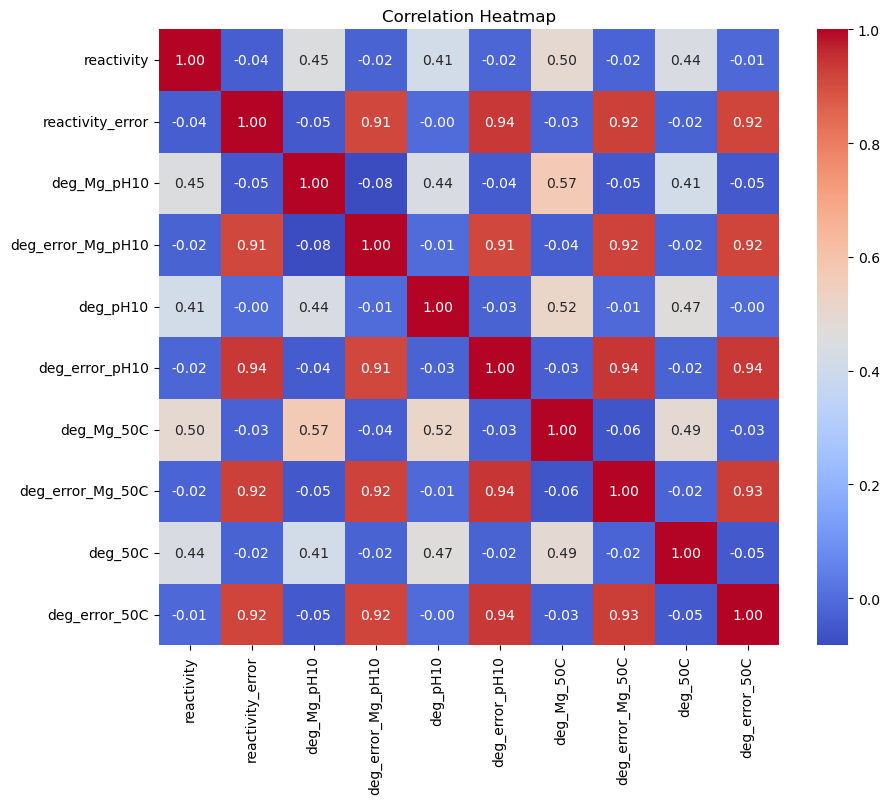

In [12]:
# Correlation matrix
correlation_matrix = train_data[num_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Box Plots

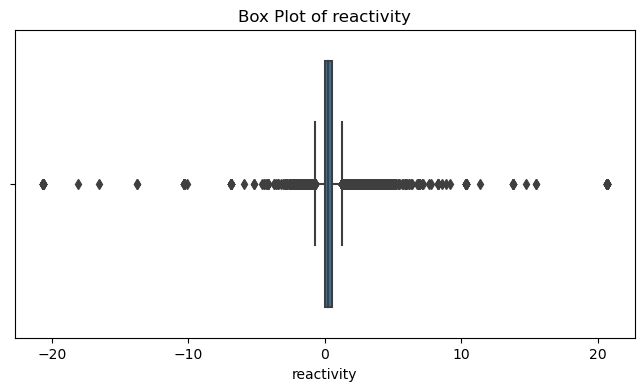

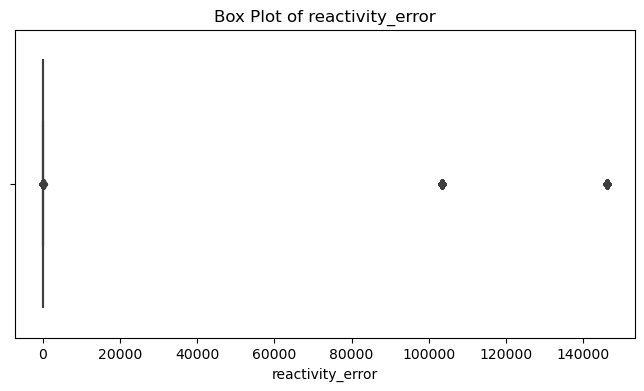

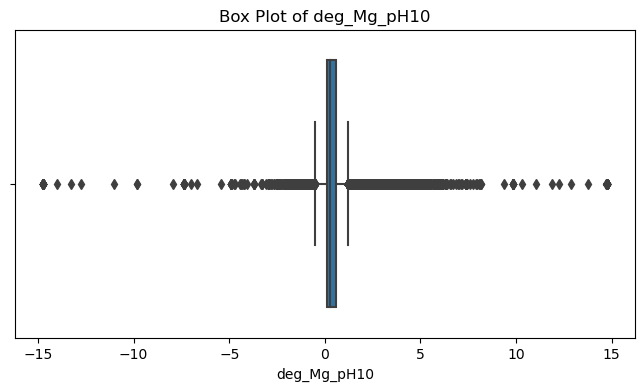

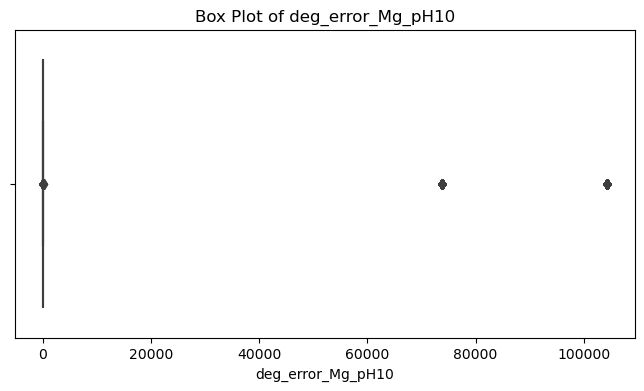

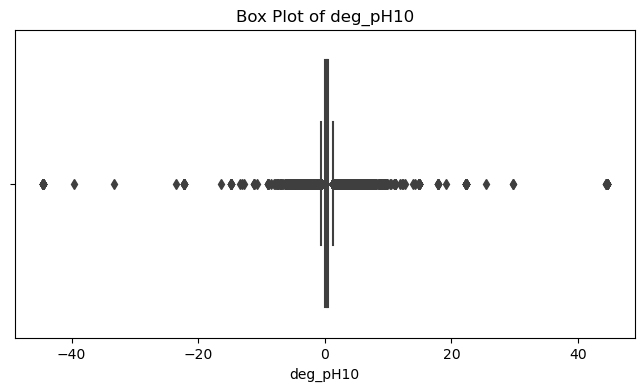

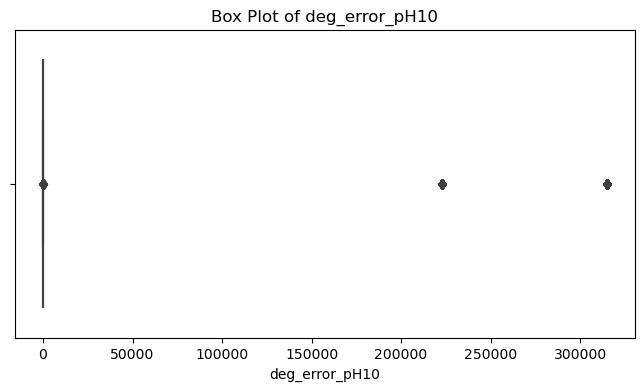

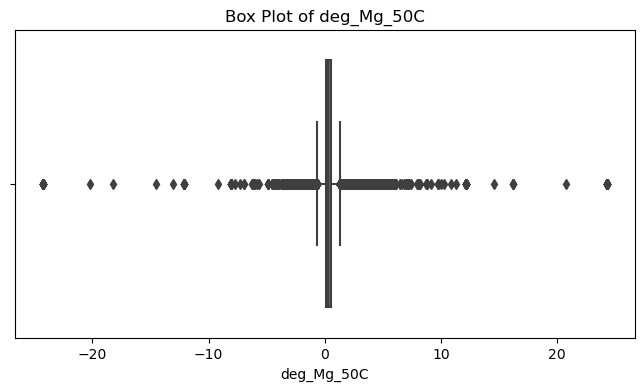

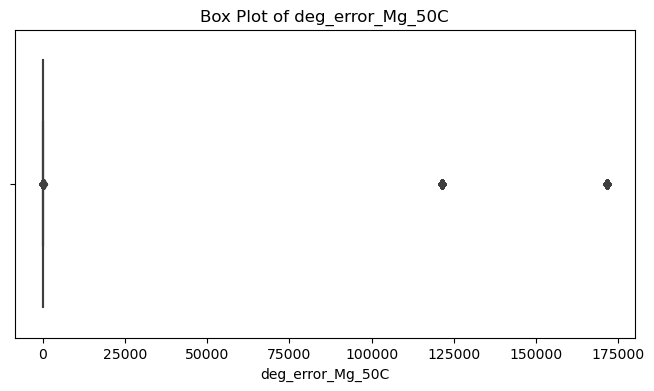

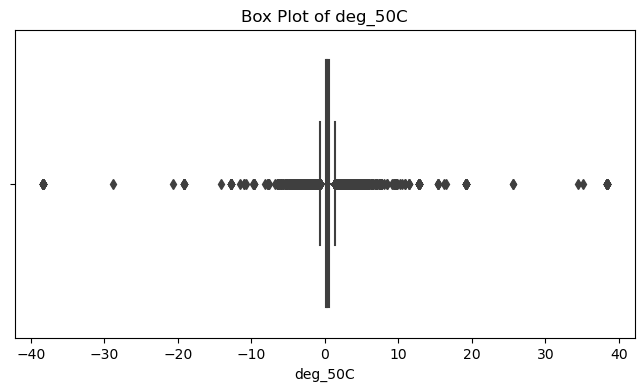

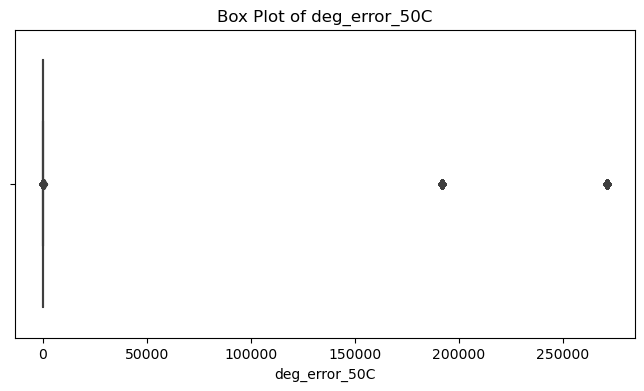

In [13]:
# Box plots for numerical features
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_data, x=col)
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.show()

### Feature Relationships

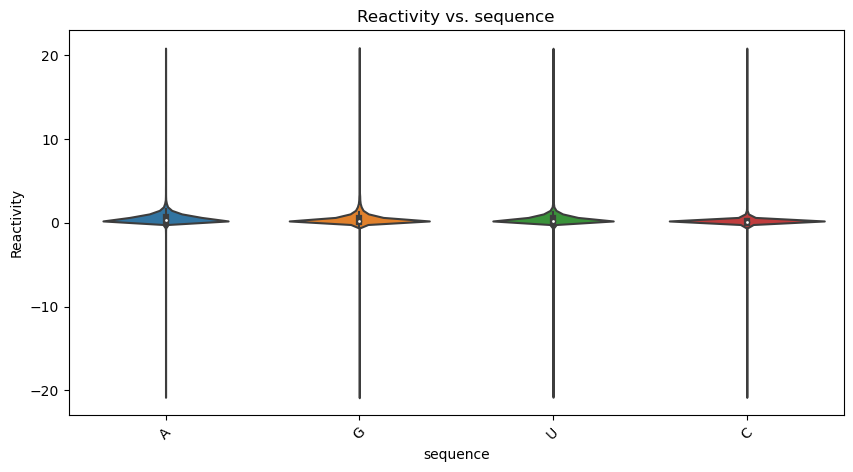

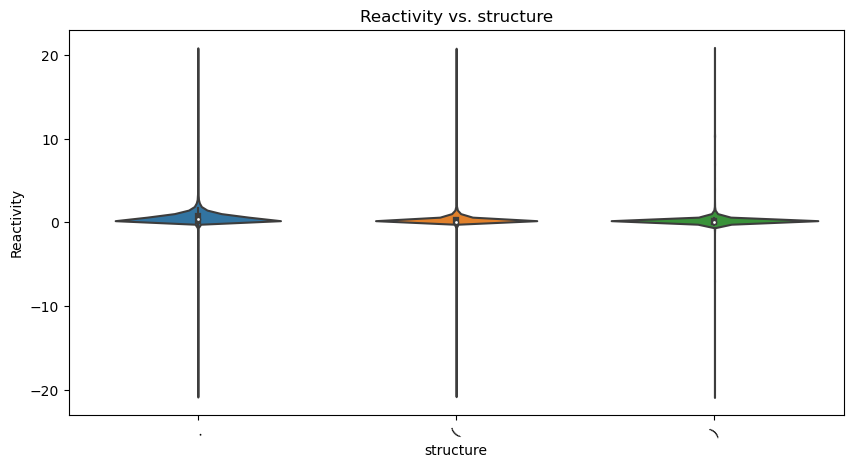

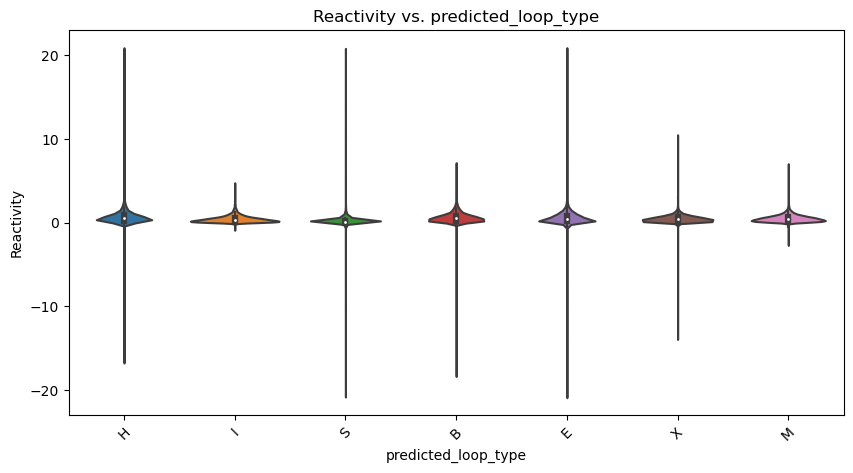

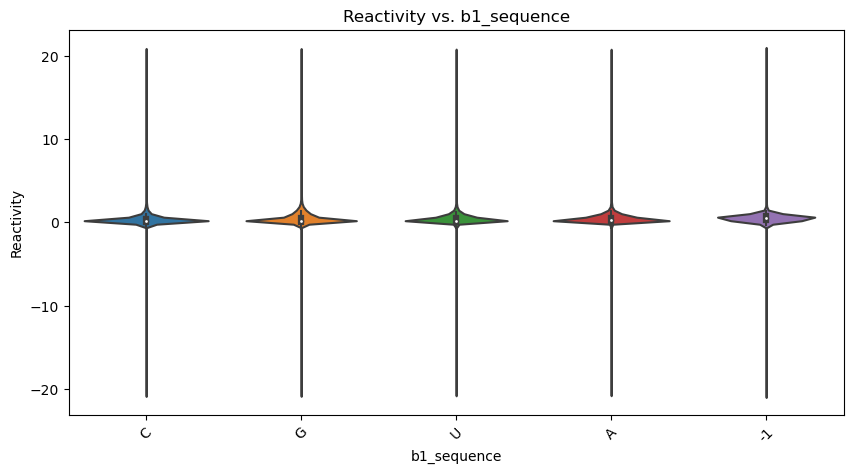

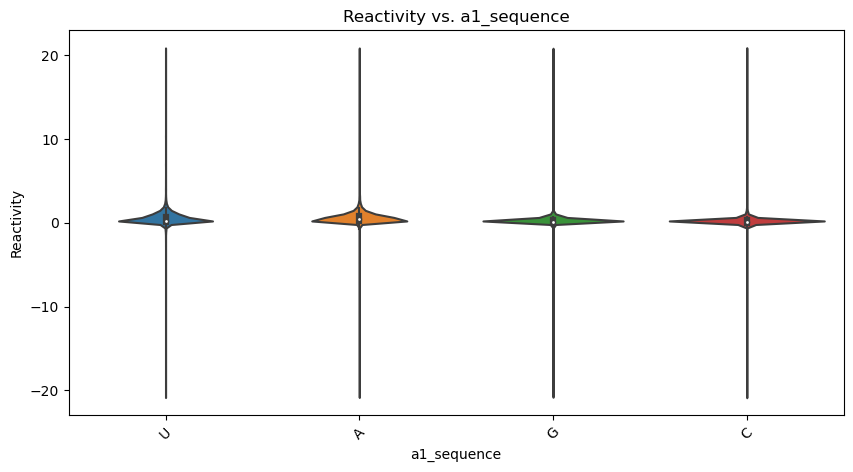

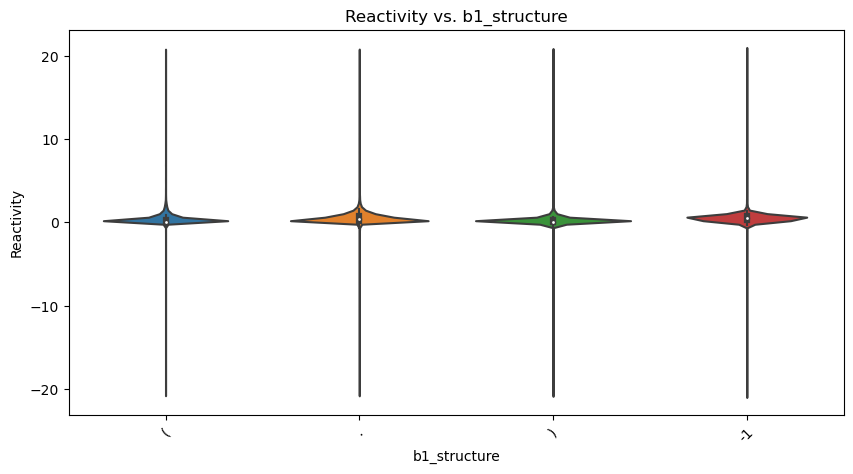

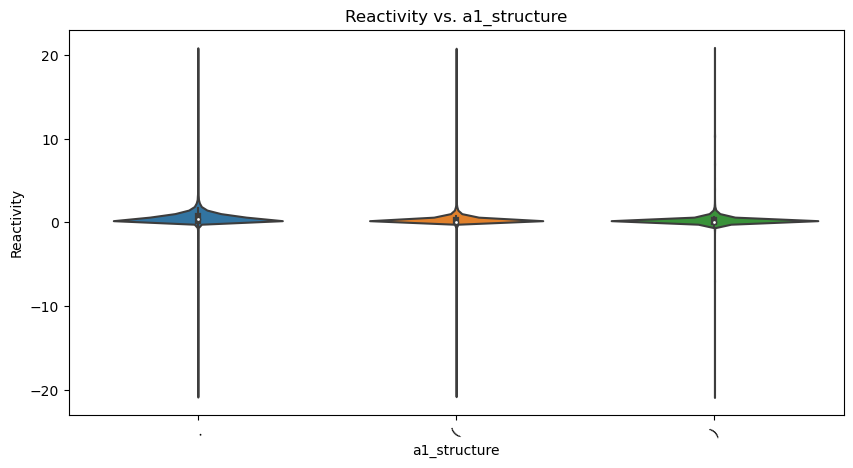

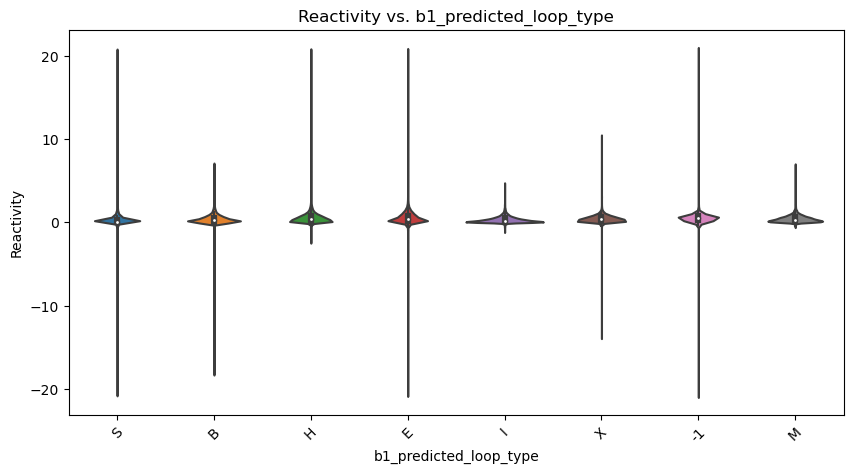

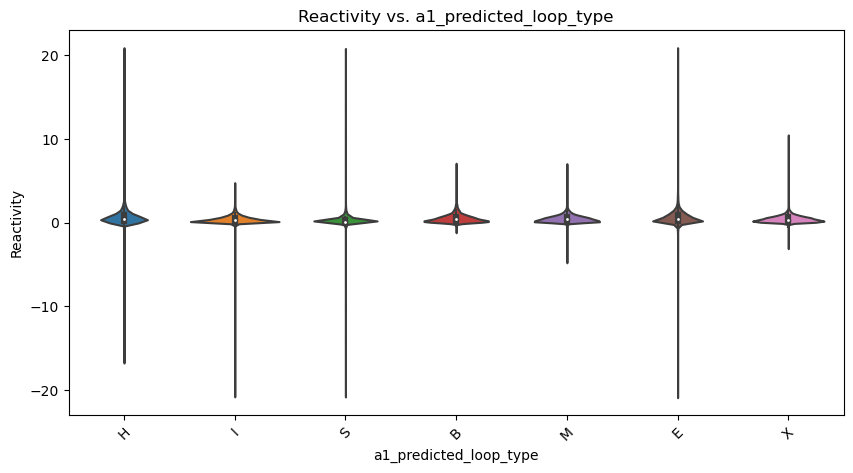

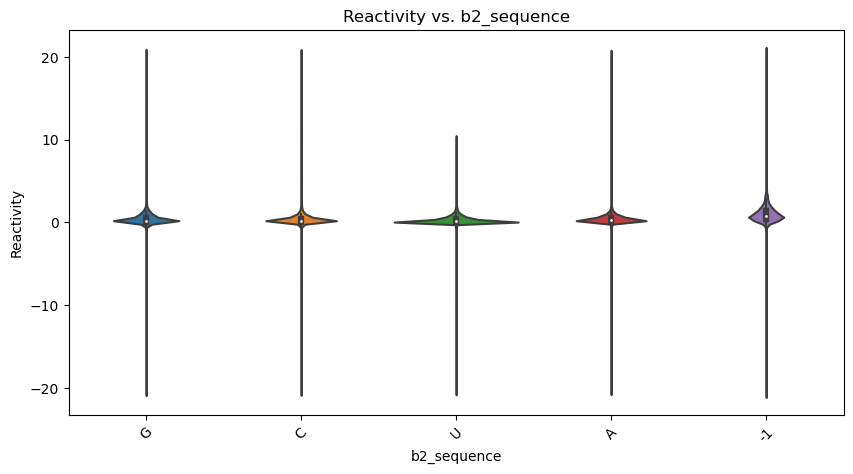

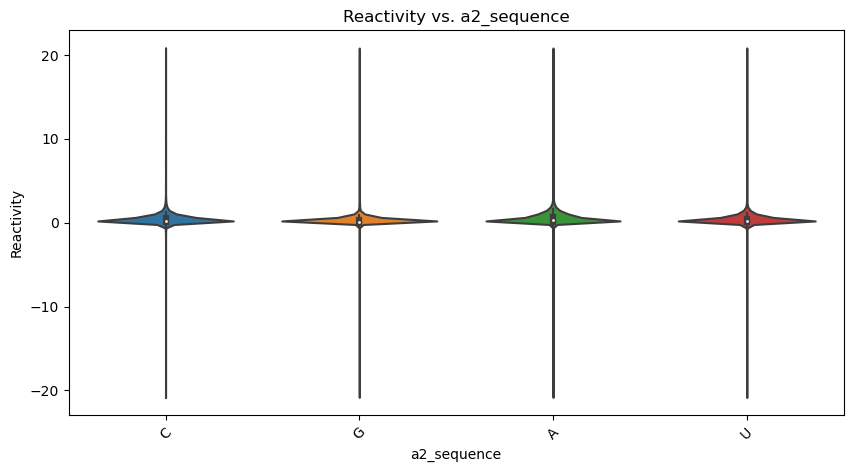

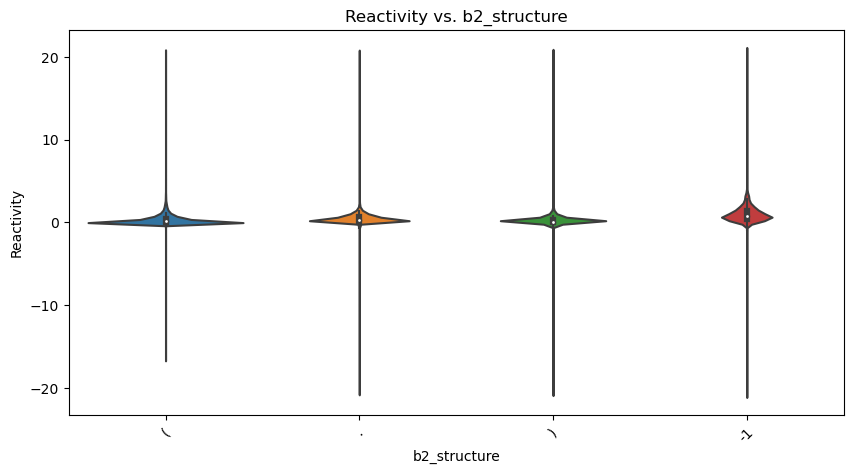

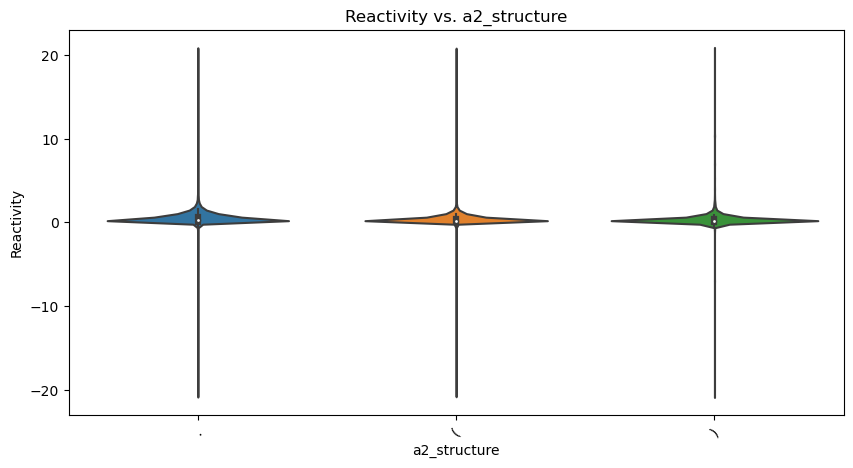

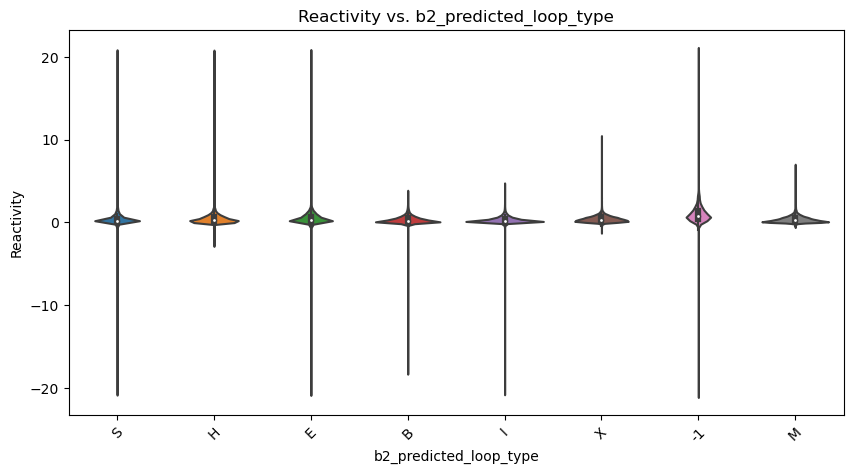

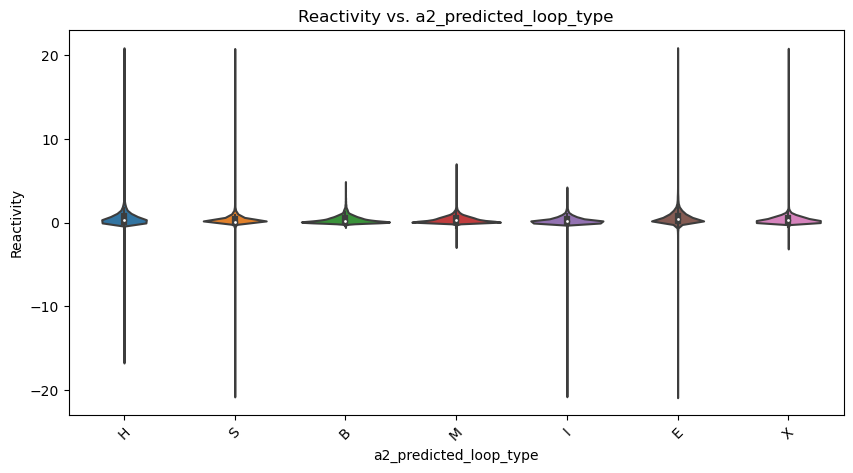

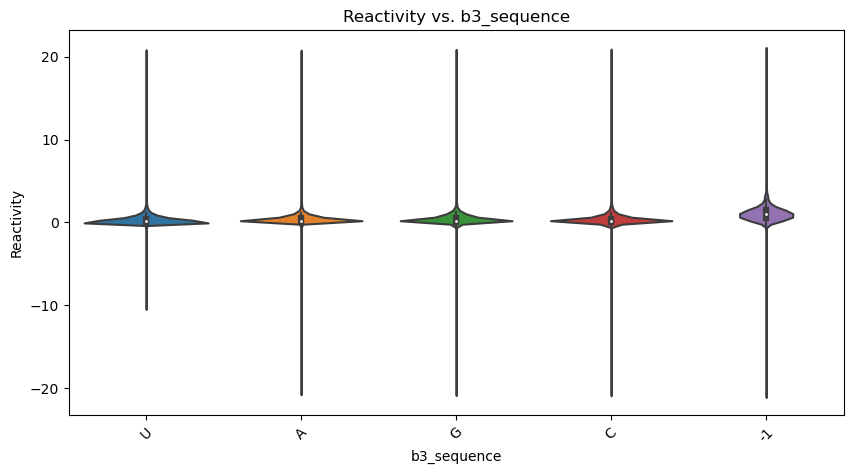

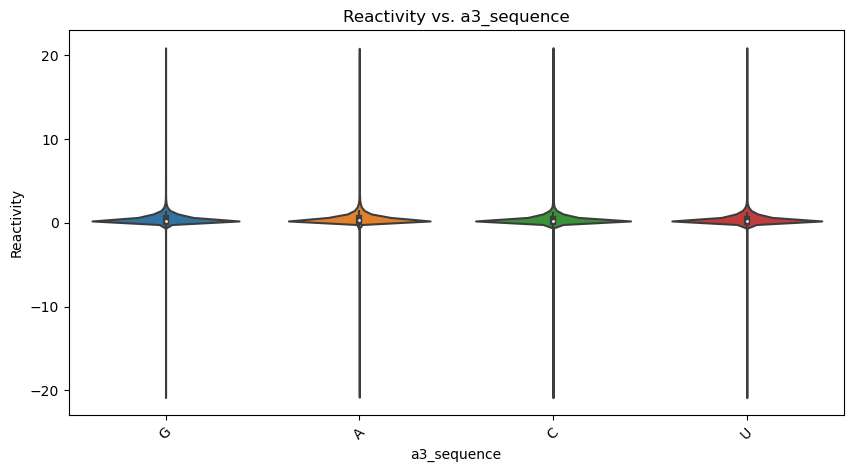

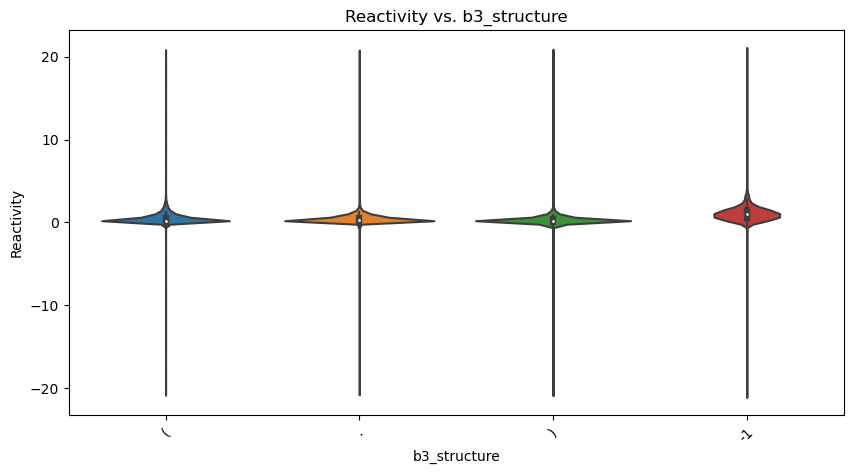

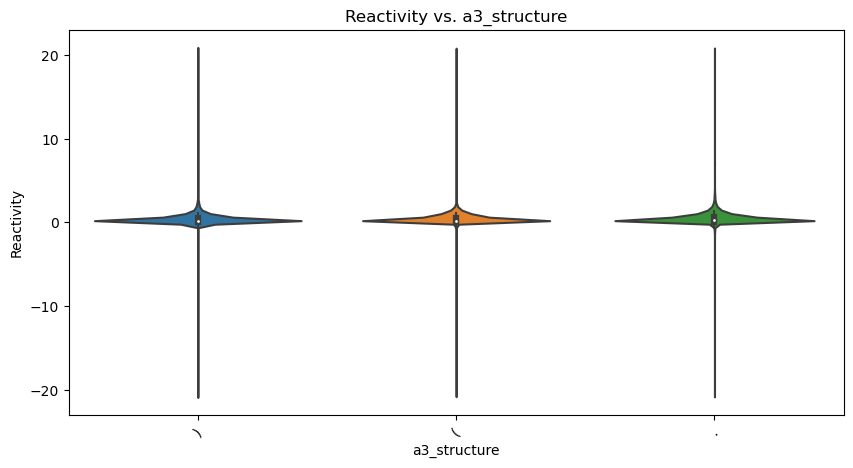

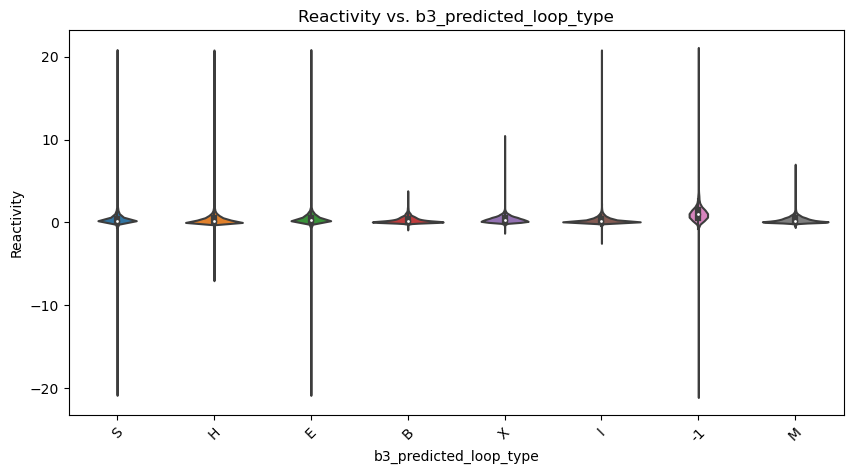

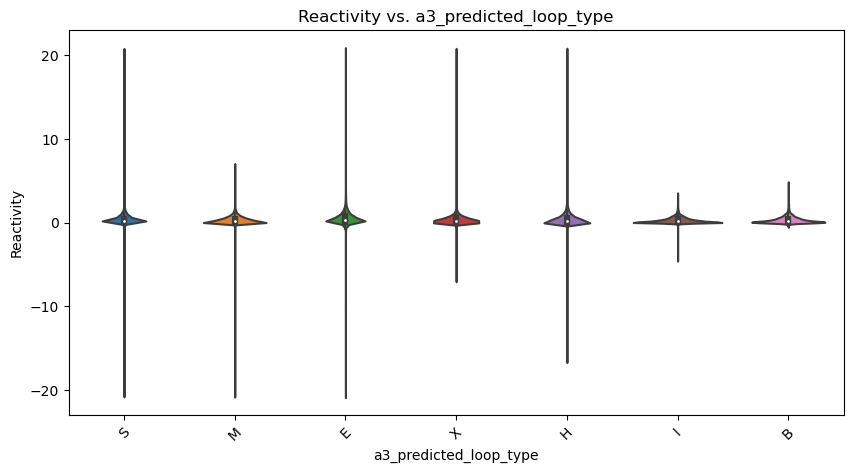

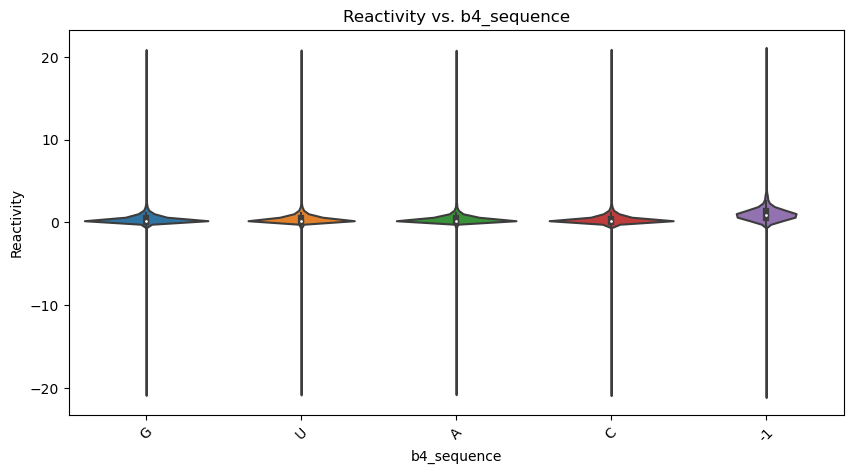

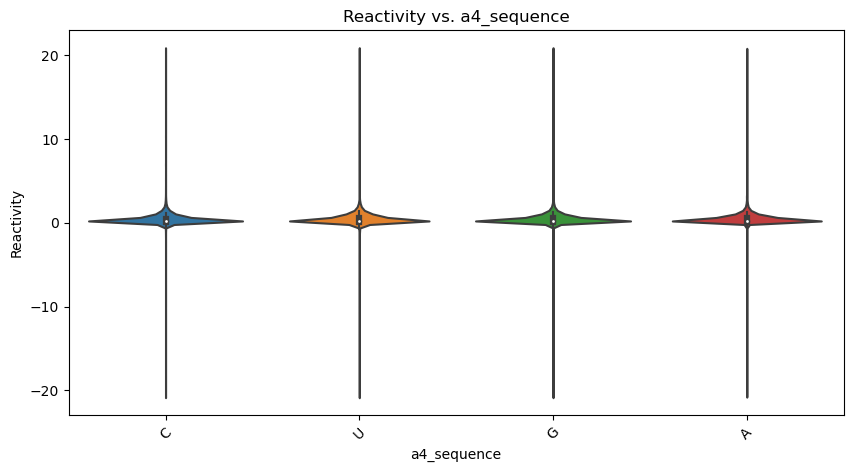

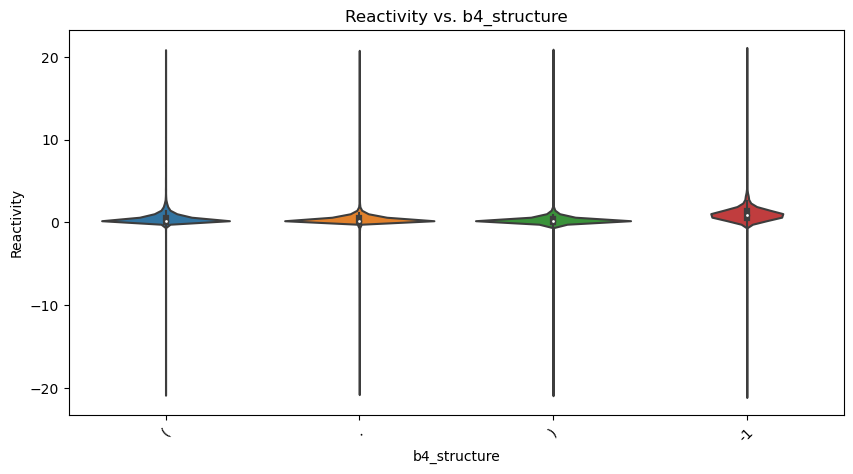

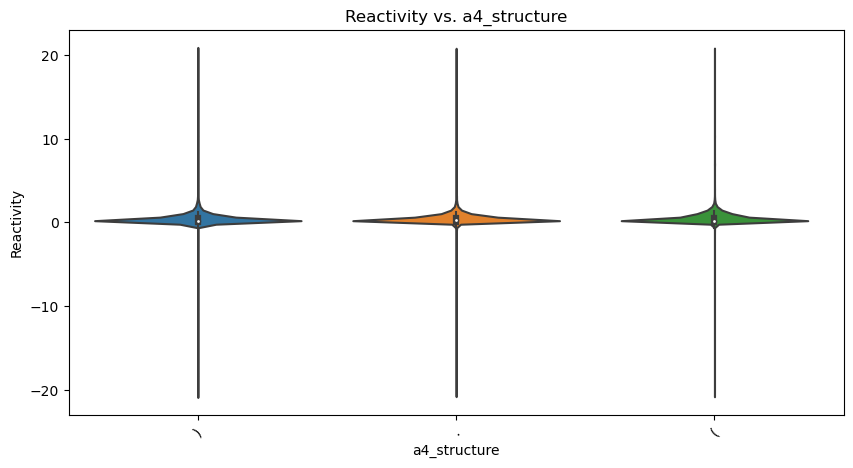

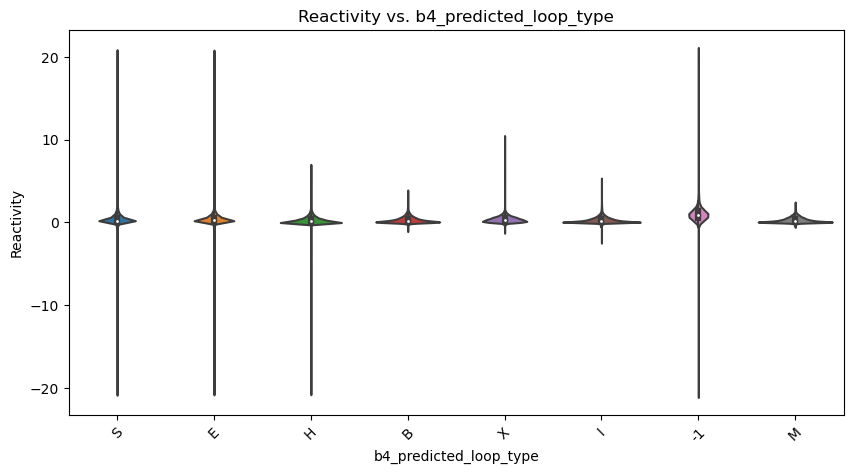

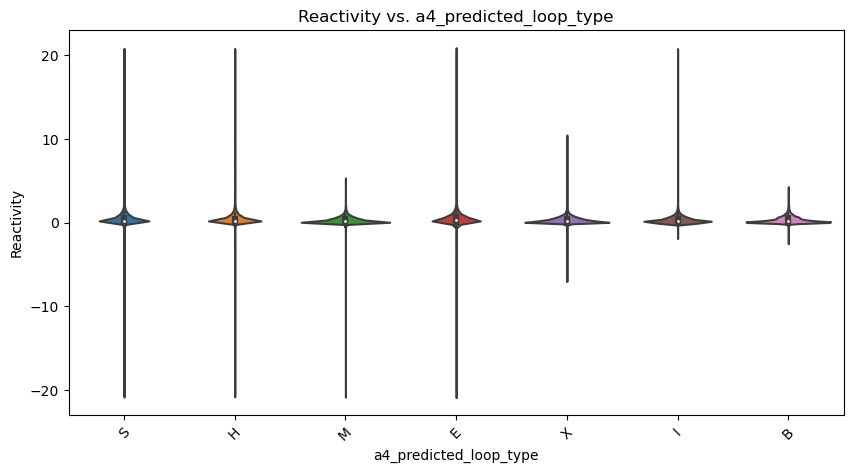

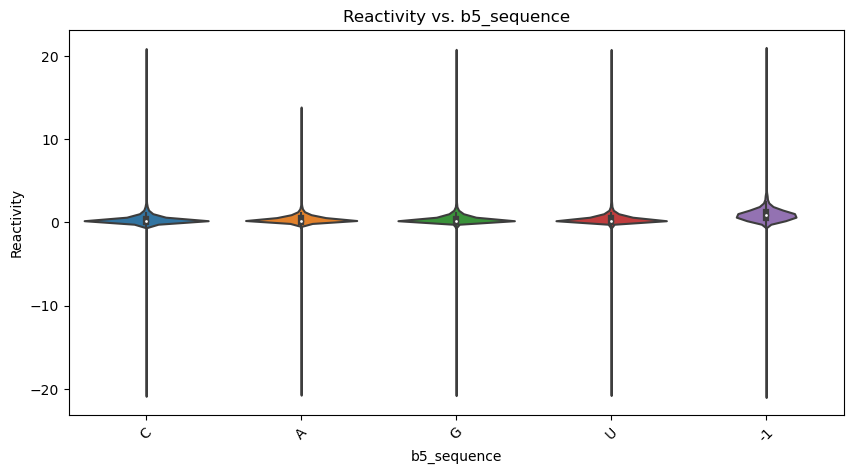

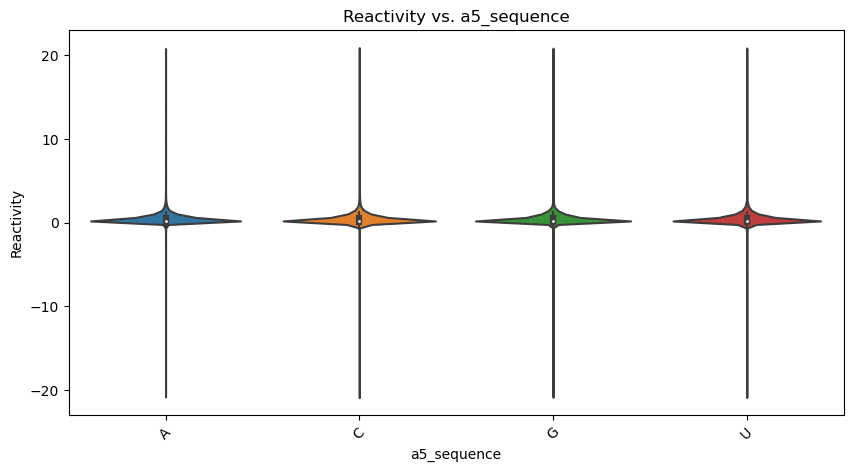

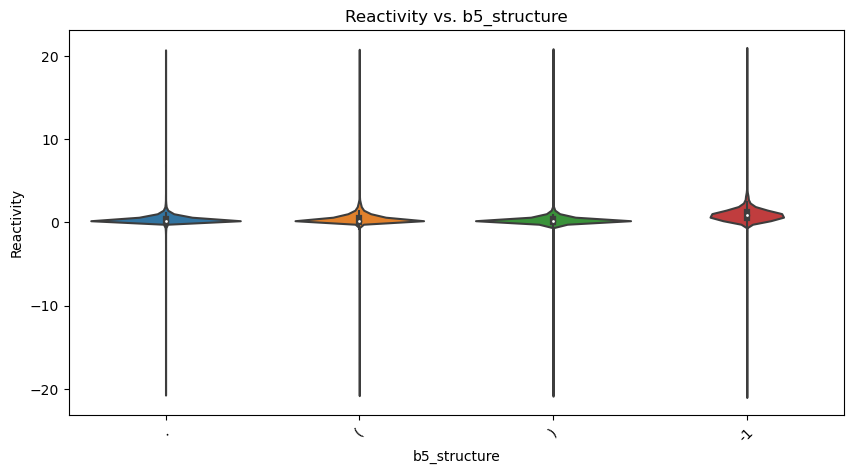

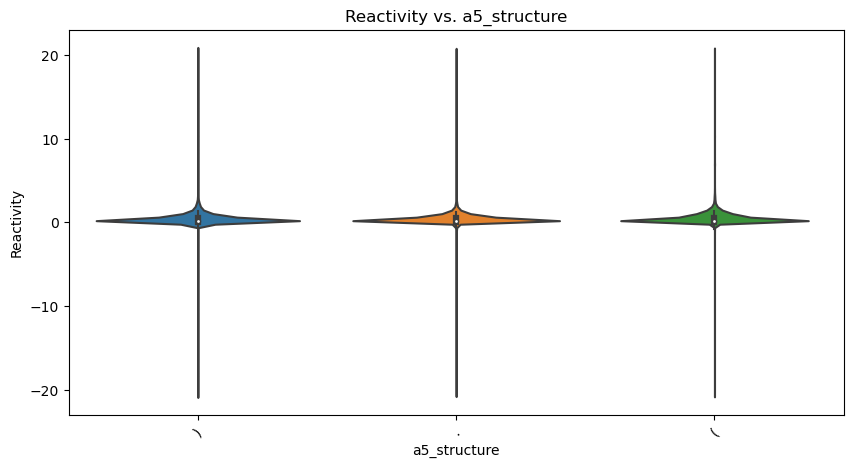

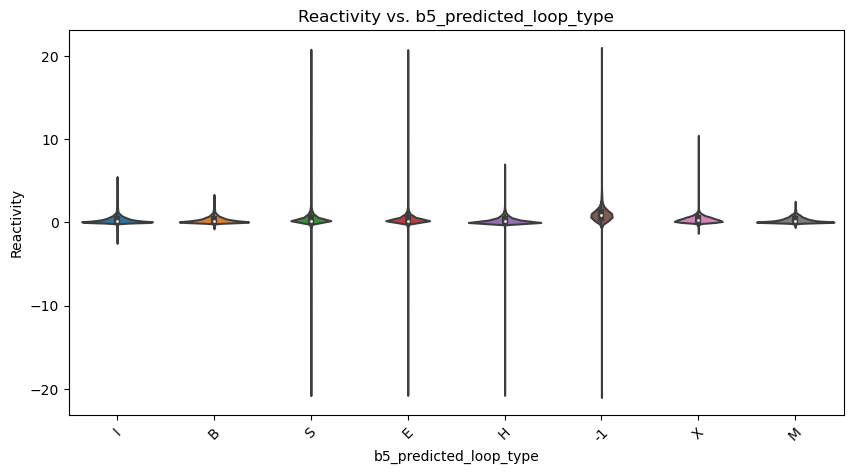

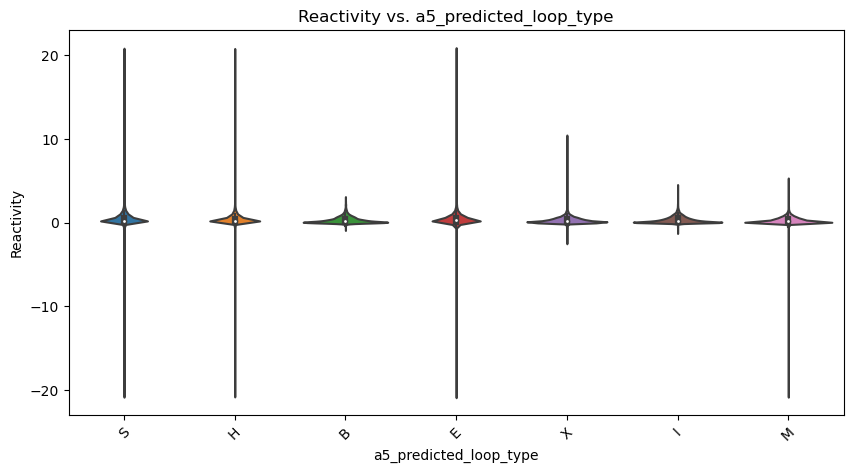

In [14]:
# Violin plots or bar plots for numerical vs. categorical features
for cat_col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=train_data, x=cat_col, y='reactivity')
    plt.xticks(rotation=45)
    plt.xlabel(cat_col)
    plt.ylabel('Reactivity')
    plt.title(f'Reactivity vs. {cat_col}')
    plt.show()
